<table>
    <tr>
      <td>Minería de datos y Paradigma BigData - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




# Tratamiento de nulos



### Índice
[Introducción](#Introducción)<br>
[Contando Nulos](#Contando)<br>
[Nulos graficamente](#Graficamente)<br>
[No nulos, pero casi](#Nonulos)<br>
[¿Qué hacer?](#Que)<br>
[Bibliografía](#Bibliografía)<br>

<a name="Intro"></a>
## Introducción

Los valores nulos llamados en inglés *missing* son *huecos* o valores que faltan en nuestro dataset. Pueden impedir que se hagan algunas operaciones o introducir sesgo en otras. Entender por qué surgen y buscar formas de corregirlos es importante para lograr datos de calidad.

<a name="Contando"></a>
## Contando nulos

Los valores nulos se representan mediante la constante NaN que se puede obtener como 

`pd.NA`, `float('nan')`, `math.nan`, or `np.nan`. También el valor `None` se cuenta en Pandas como un valor NaN.




In [1]:
import numpy as np
import pandas as pd
import math 
df = pd.DataFrame({'a': [1, np.nan, 3, math.nan, float('nan'), None],
                   'b': [1, pd.NA, 3, 4, 6, None],
                   'c': [1, 2, 3, 4, 6, np.nan]})
df

,a,b,c
0,1.0,1,1.0
1,NaN,<NA>,2.0
2,3.0,3,3.0
3,NaN,4,4.0
4,NaN,6,6.0
5,NaN,None,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       2 non-null      float64
 1   b       4 non-null      object 
 2   c       5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 276.0+ bytes


Podemos ver los nulos por columnas con el método `isna`

In [4]:
df.isna().sum()

a    4
b    2
c    1
dtype: int64

Para ver los totales por fila:

In [5]:
df.isna().sum(axis=1)

0    0
1    2
2    0
3    1
4    1
5    3
dtype: int64

Columnas con algún nulo

In [6]:
(df.isna().sum() > 0).sum()

3

filas com algún nulo:

In [7]:
(df.isna().sum(axis=1) > 0).sum()

4

Columnas con todo nulos

In [8]:
(df.isna().sum() == df.shape[0]).sum()

0

Filas con todo nulos:

In [9]:
(df.isna().sum(axis=1) == df.shape[1]).sum()

1

Y el total absoluto:

In [10]:
total = df.isna().sum().sum()
total

7

También es interesante ver la proporción de nulos:

In [11]:
round(100*total/(df.shape[0]*df.shape[1]),3)

38.889

<a name="Graficamente"></a>
## Nulos gráficamente
Sobre todo en el caso de dataframes con gran cantidad de datos utilizar una visualización adecuada puede ayudar a entender el origen de los nulos

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


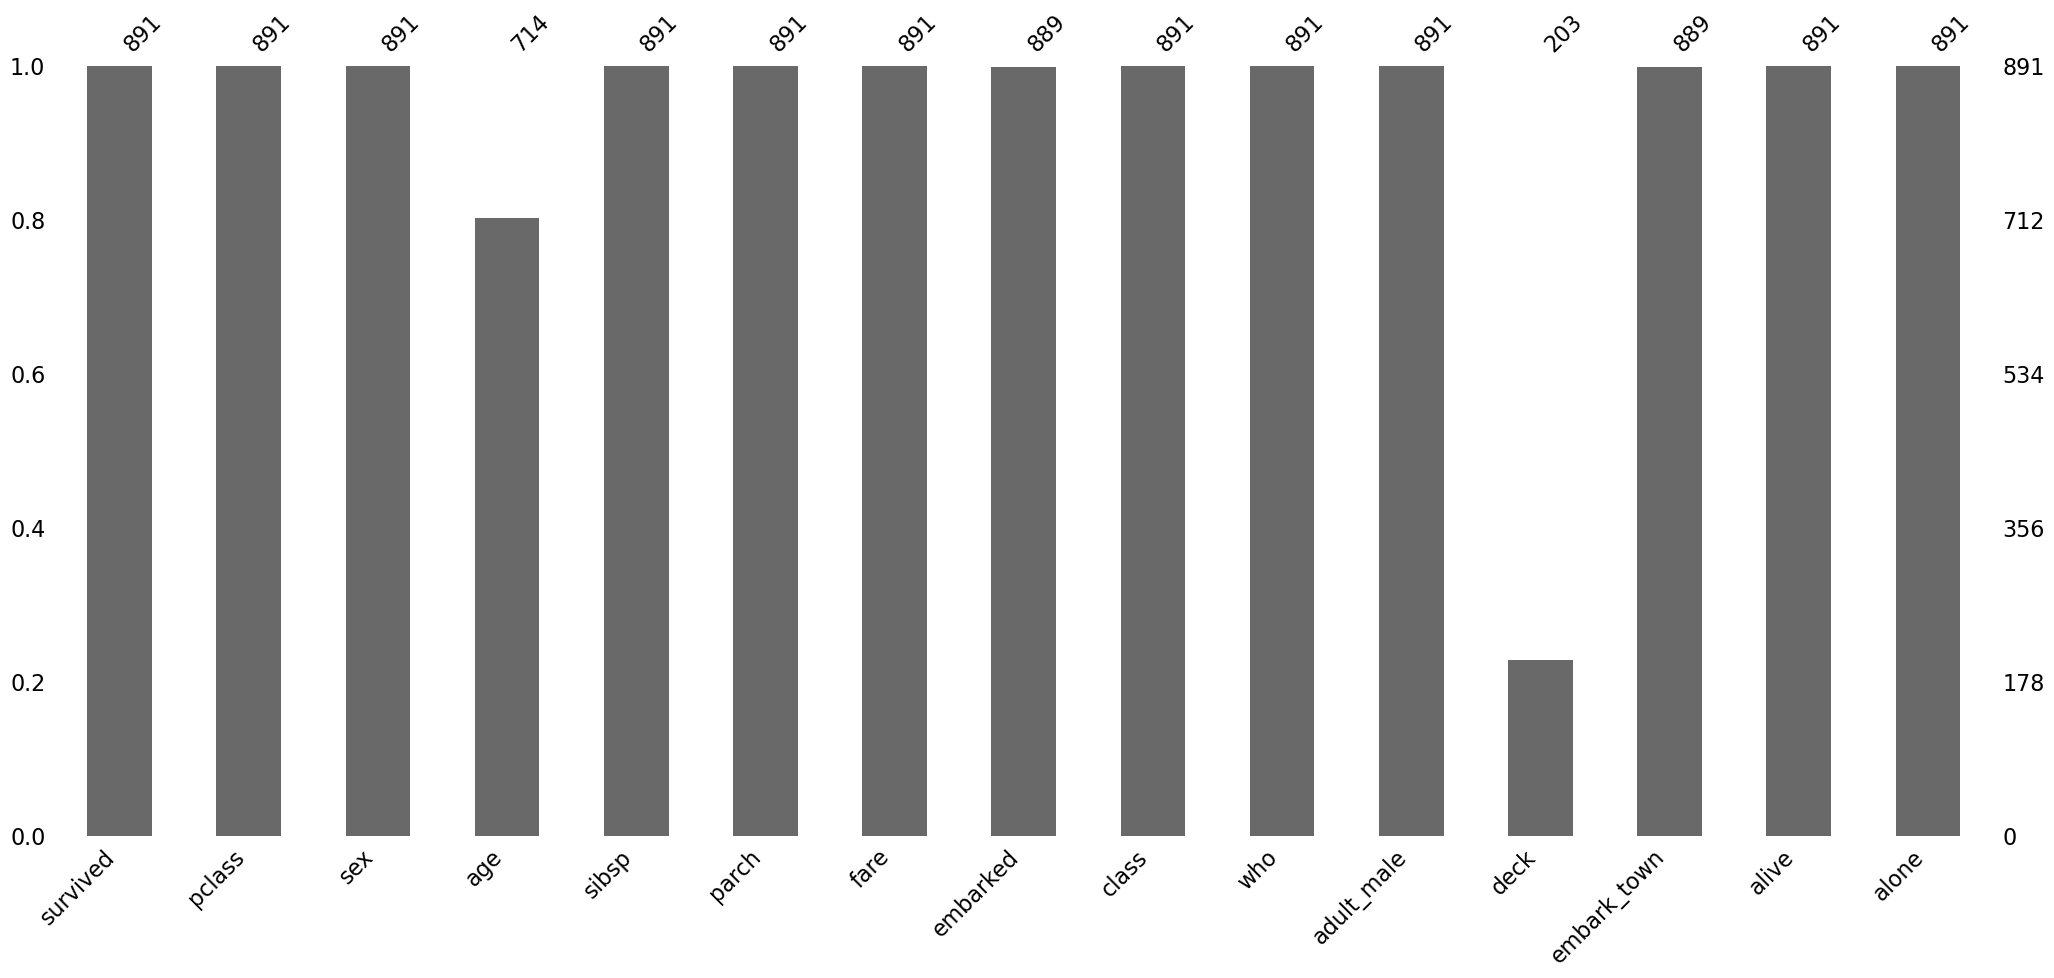

In [9]:
msno.bar(titanic)
plt.show()

Otra forma de ver lo mismo

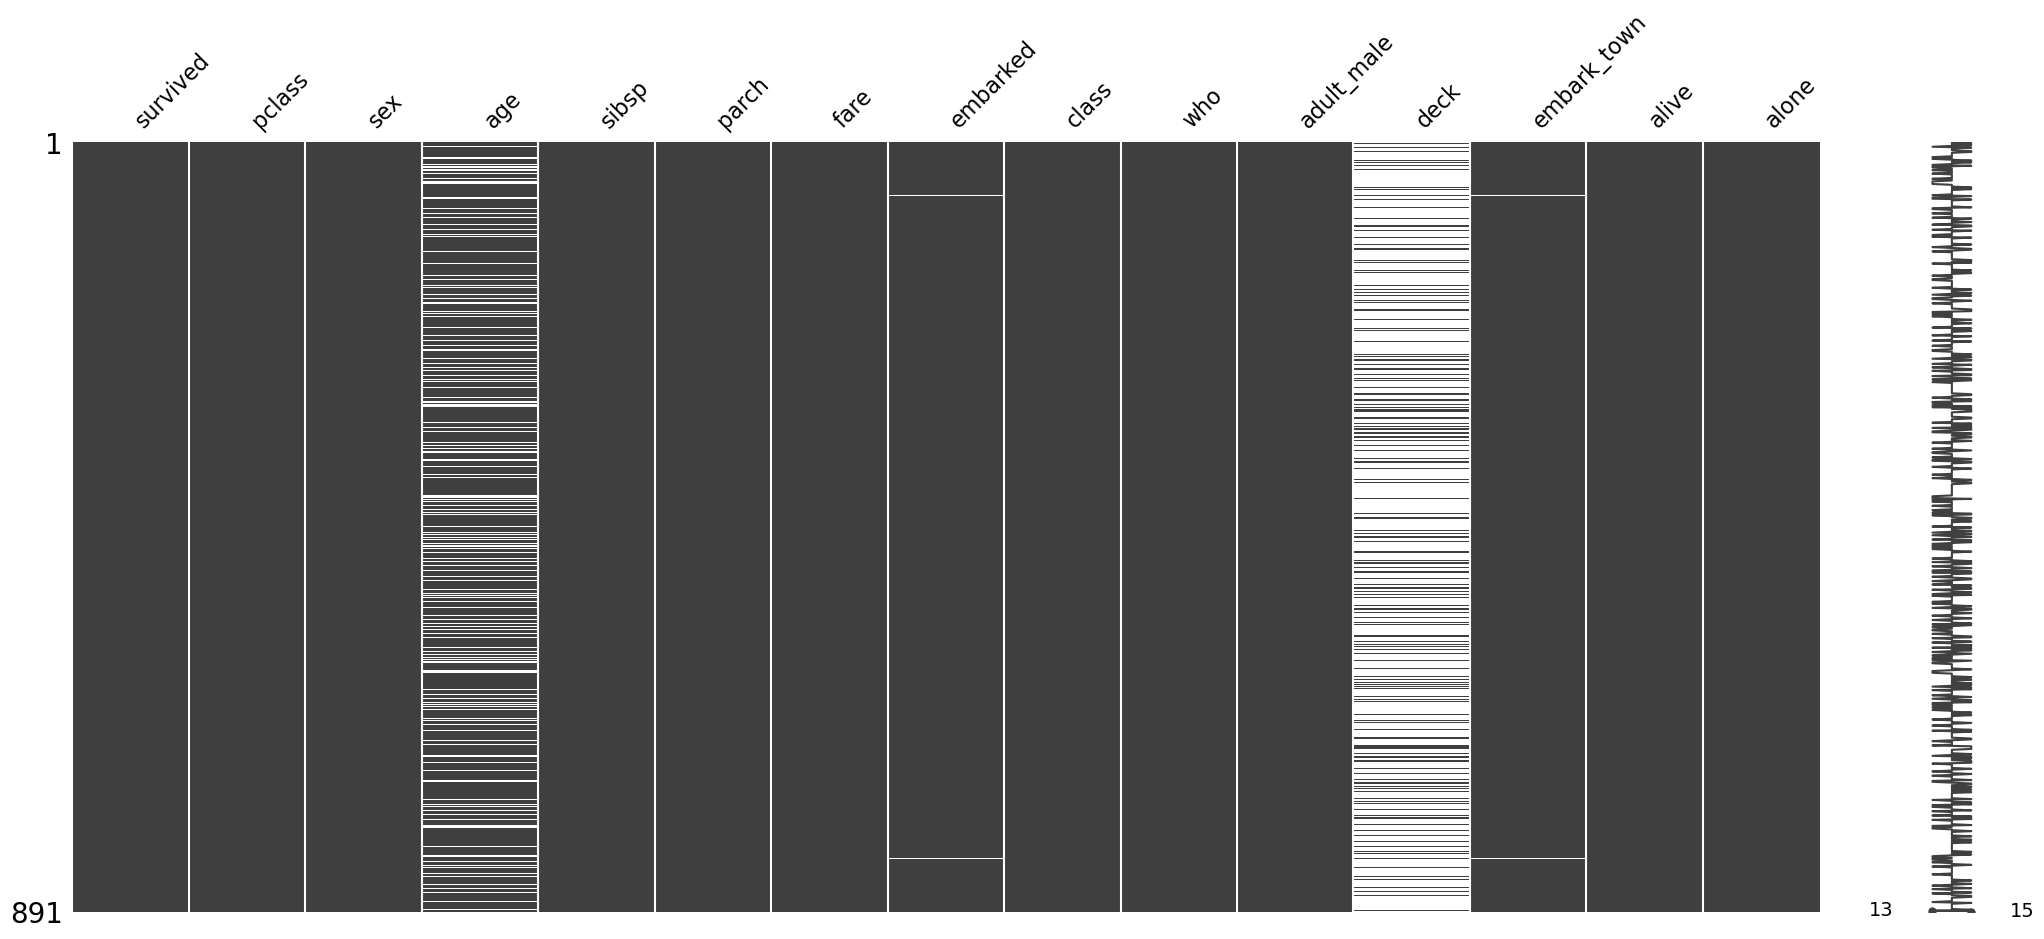

In [10]:
msno.matrix(titanic)
plt.show()

Esto nos da mucha información y muy útil:

* Parece que solo age y deck tienen nulos. 

* Aparte hay 2 filas que tienen nulos también en `embarked`, `embark_town` (se podrían eliminar?)

El método `heatmap` nos ayudará a relacionar columnas con nulos:

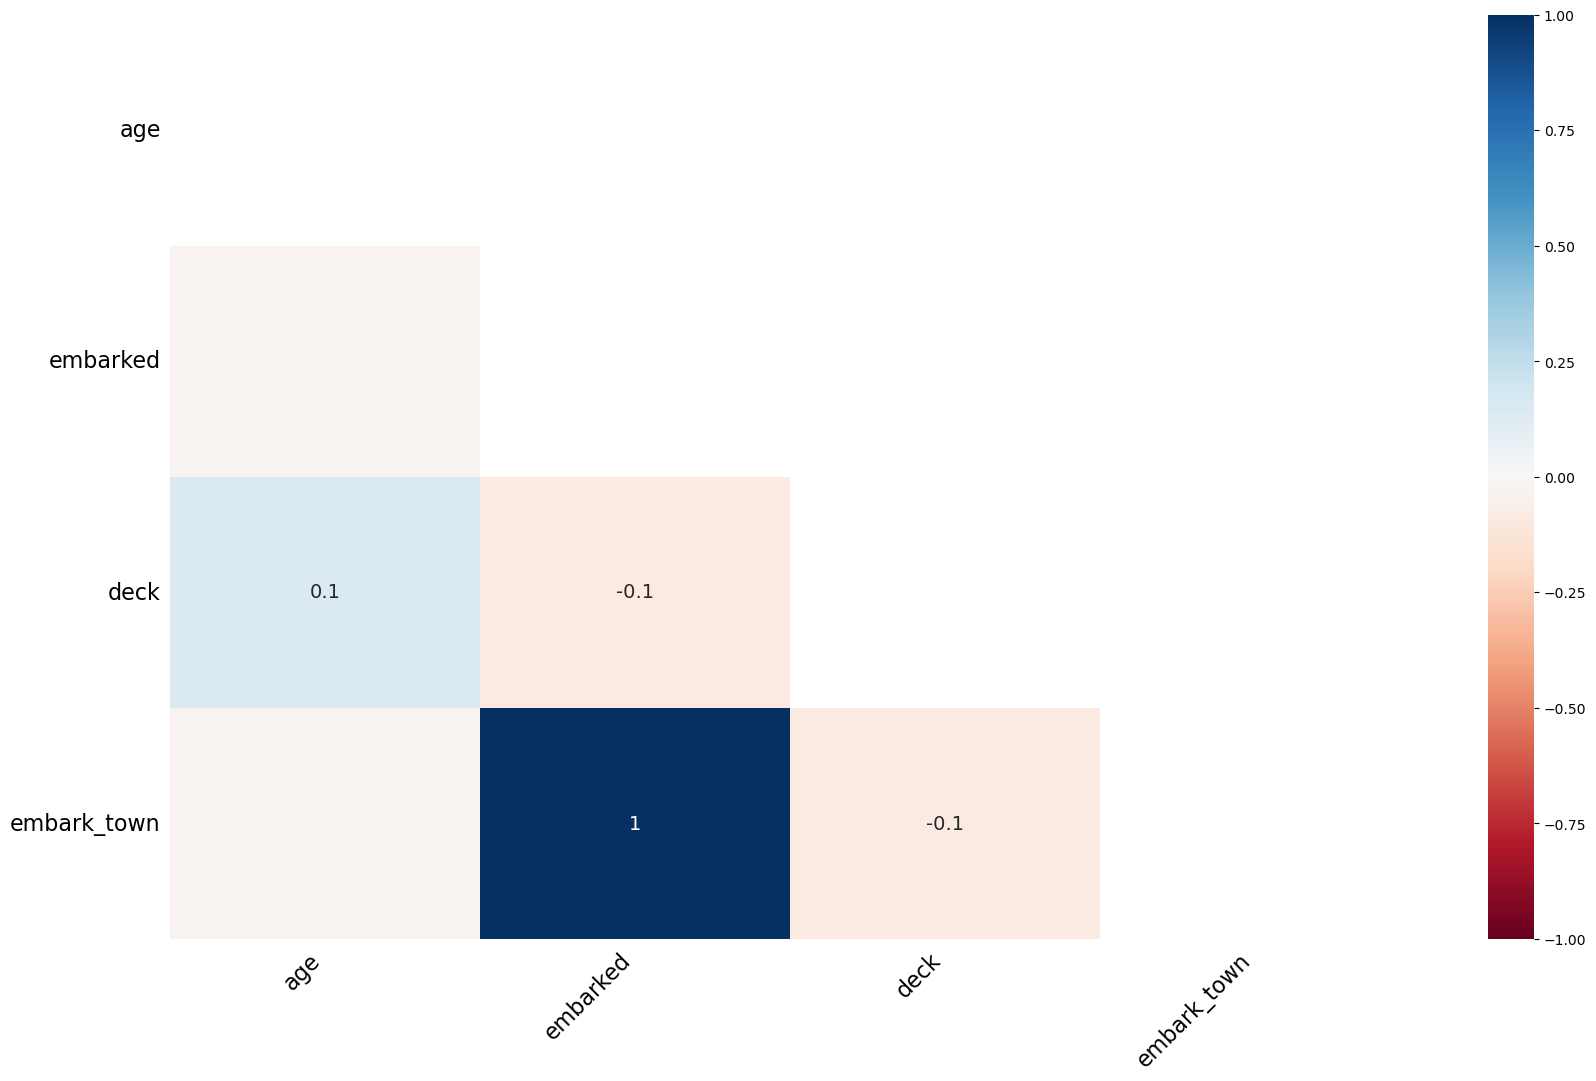

In [11]:
msno.heatmap(titanic)
plt.show()

Vemos que siempre que embarked es missing también lo es embark_town. 

Podríamos hacer varias operaciones

In [12]:
titanic2 = titanic.copy()

#borrar todas las filas nulas
titanic2.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Consultamos si existe alguna fila con todos sus valores nulos

In [13]:
titanic2.isnull().all(axis=1).sum()

0

In [14]:
#Vamos a probar con insertar una fila con todos sus valores nulos:
import numpy as np

# Crear una fila con NaN para todas las columnas
#fila_nula = pd.DataFrame([{col: np.nan for col in titanic.columns}])
diccionario_nulo={}
for col in titanic.columns:
    diccionario_nulo[col] = np.nan
fila_nula = pd.DataFrame([diccionario_nulo])

# Agregarla al final del DataFrame
titanic2 = pd.concat([titanic, fila_nula], ignore_index=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    float64 
 1   pclass       891 non-null    float64 
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    float64 
 5   parch        891 non-null    float64 
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(6), object(7)
memory usage: 92.9+ KB


/var/folders/7y/7qbnckg175x_7bb72vdwtdkw0000gn/T/ipykernel_6867/3815700124.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  titanic2 = pd.concat([titanic, fila_nula], ignore_index=True)
/var/folders/7y/7qbnckg175x_7bb72vdwtdkw0000gn/T/ipykernel_6867/3815700124.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  titanic2 = pd.concat([titanic, fila_nula], ignore_index=True)


In [15]:
titanic2.isnull().all(axis=1).sum()

1

In [16]:
#Probamos a eliminar la fila nula
titanic2 = titanic2.dropna(how = 'all')
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    float64 
 1   pclass       891 non-null    float64 
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    float64 
 5   parch        891 non-null    float64 
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(6), object(7)
memory usage: 99.7+ KB


Probamos otra vez

In [17]:
titanic2.isnull().all(axis=1).sum()

0

Finalmente, vamos a probar a eliminar los nulos cuyas columnas tengan menos de una cantidad de valores no nulos.

In [18]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    float64 
 1   pclass       891 non-null    float64 
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    float64 
 5   parch        891 non-null    float64 
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(6), object(7)
memory usage: 99.7+ KB


In [19]:
titanic2.dropna(axis=1, thresh=205)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,1.0,Southampton,no,0.0
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,0.0,Cherbourg,yes,0.0
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,0.0,Southampton,yes,1.0
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,0.0,Southampton,yes,0.0
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,1.0,Southampton,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S,Second,man,1.0,Southampton,no,1.0
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S,First,woman,0.0,Southampton,yes,1.0
888,0.0,3.0,female,NaN,1.0,2.0,23.4500,S,Third,woman,0.0,Southampton,no,0.0
889,1.0,1.0,male,26.0,0.0,0.0,30.0000,C,First,man,1.0,Cherbourg,yes,1.0


In [20]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    float64 
 1   pclass       891 non-null    float64 
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    float64 
 5   parch        891 non-null    float64 
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(6), object(7)
memory usage: 99.7+ KB


<a name="Nonulos"></a>
## No nulos, pero casi
En ocasiones hay valores que no son nulos pero son "señales" que indican falta de información. Valores como "99" o valores negativos en columnas que deben tener valores no negativos. Lo que debemos hacer es convertir estos valores en NaN

In [21]:
url="https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/NATOships.csv"
df2 = pd.read_csv(url)
df2

,course,speed,status,flag,length,beam,lat,long,MMSI
0,178.2,15.9,Under way,Germany,174.0,24.0,38.15398,26.16882,211927000
1,357.1,5.6,-,Spain,96.0,14.0,36.38972,-3.44095,224067000
2,286.9,9.5,-,Spain,NaN,NaN,36.97802,-7.14493,225304000
3,359.9,0.0,-,Spain,NaN,NaN,36.71028,-4.42075,225333000
4,130.5,0.0,-,France,65.0,14.0,-22.29121,166.43580,228762000
...,...,...,...,...,...,...,...,...,...
170,0.9,0.0,-,USA,NaN,NaN,32.67315,-117.12343,338830000
171,30.7,10.4,-,United States (USA),NaN,NaN,-19.21945,146.84966,368921000
172,156.3,11.8,-,United States (USA),NaN,NaN,34.63709,139.79750,368948000
173,105.1,0.0,-,United States (USA),NaN,NaN,54.40621,18.65539,368869000


Queremos reemplazar los valores "-" por NaN

In [22]:
df2["status"] = df2["status"].replace("-",pd.NA)
df2

,course,speed,status,flag,length,beam,lat,long,MMSI
0,178.2,15.9,Under way,Germany,174.0,24.0,38.15398,26.16882,211927000
1,357.1,5.6,<NA>,Spain,96.0,14.0,36.38972,-3.44095,224067000
2,286.9,9.5,<NA>,Spain,NaN,NaN,36.97802,-7.14493,225304000
3,359.9,0.0,<NA>,Spain,NaN,NaN,36.71028,-4.42075,225333000
4,130.5,0.0,<NA>,France,65.0,14.0,-22.29121,166.43580,228762000
...,...,...,...,...,...,...,...,...,...
170,0.9,0.0,<NA>,USA,NaN,NaN,32.67315,-117.12343,338830000
171,30.7,10.4,<NA>,United States (USA),NaN,NaN,-19.21945,146.84966,368921000
172,156.3,11.8,<NA>,United States (USA),NaN,NaN,34.63709,139.79750,368948000
173,105.1,0.0,<NA>,United States (USA),NaN,NaN,54.40621,18.65539,368869000


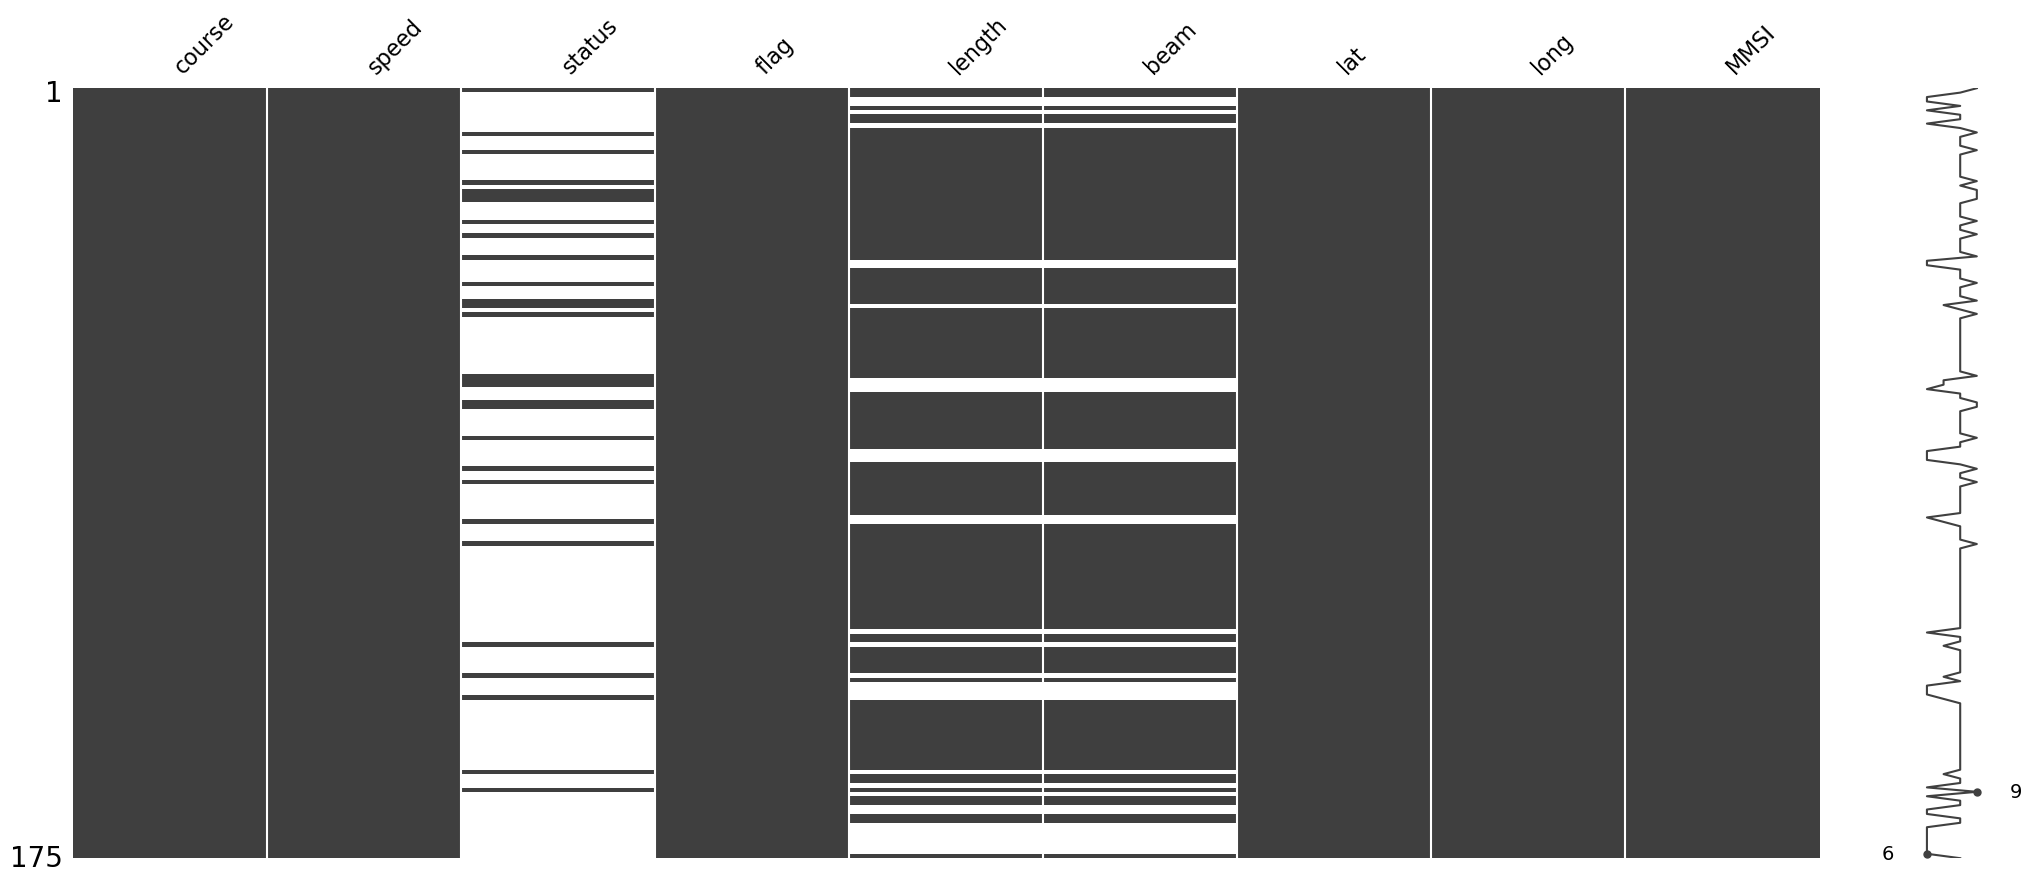

In [21]:
msno.matrix(df2)
plt.show()

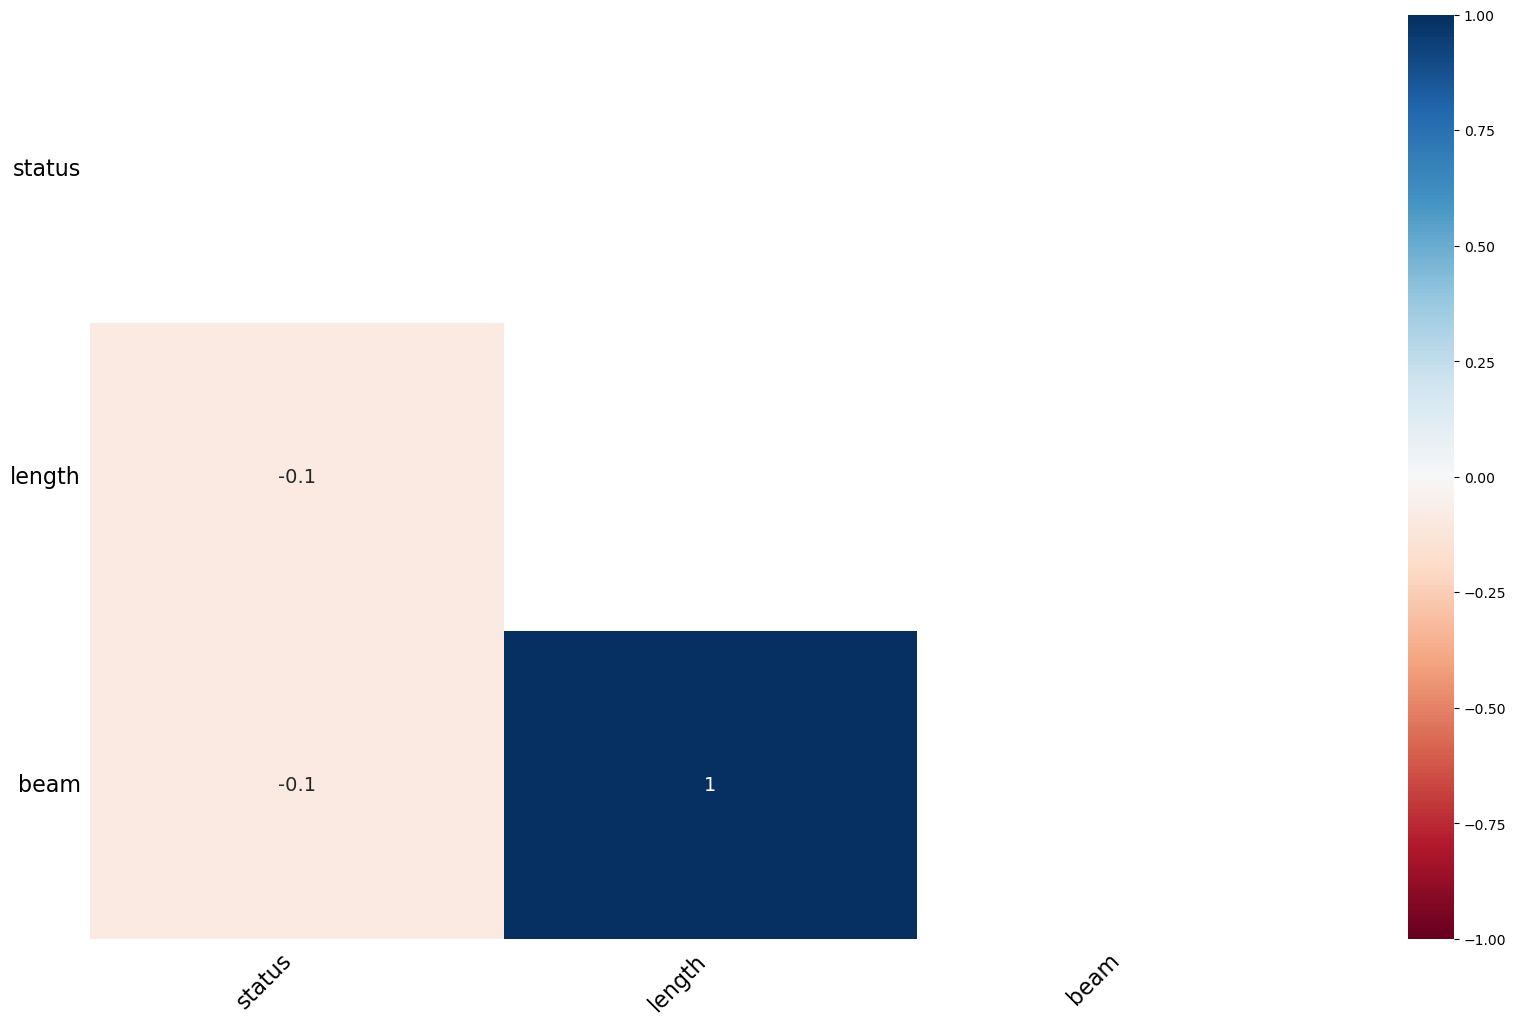

In [22]:
msno.heatmap(df2)
plt.show()

<a name="Que"></a>
## ¿Qué hacer?

* Si hay columnas con muy pocos datos válidos y que no resultan imprescindibles se pueden borrar

* Si hay muy pocas filas con un valor nulo (representan un tanto por cierto muy pequeño, menor del 1%) se pueden eliminar

* Si el número de nulos es muy alto una posibilidad es *imputar* el valor. Las formas típicas de imputar:
    - La mediana
    - La media
    - La moda (también vale para variables nominales)

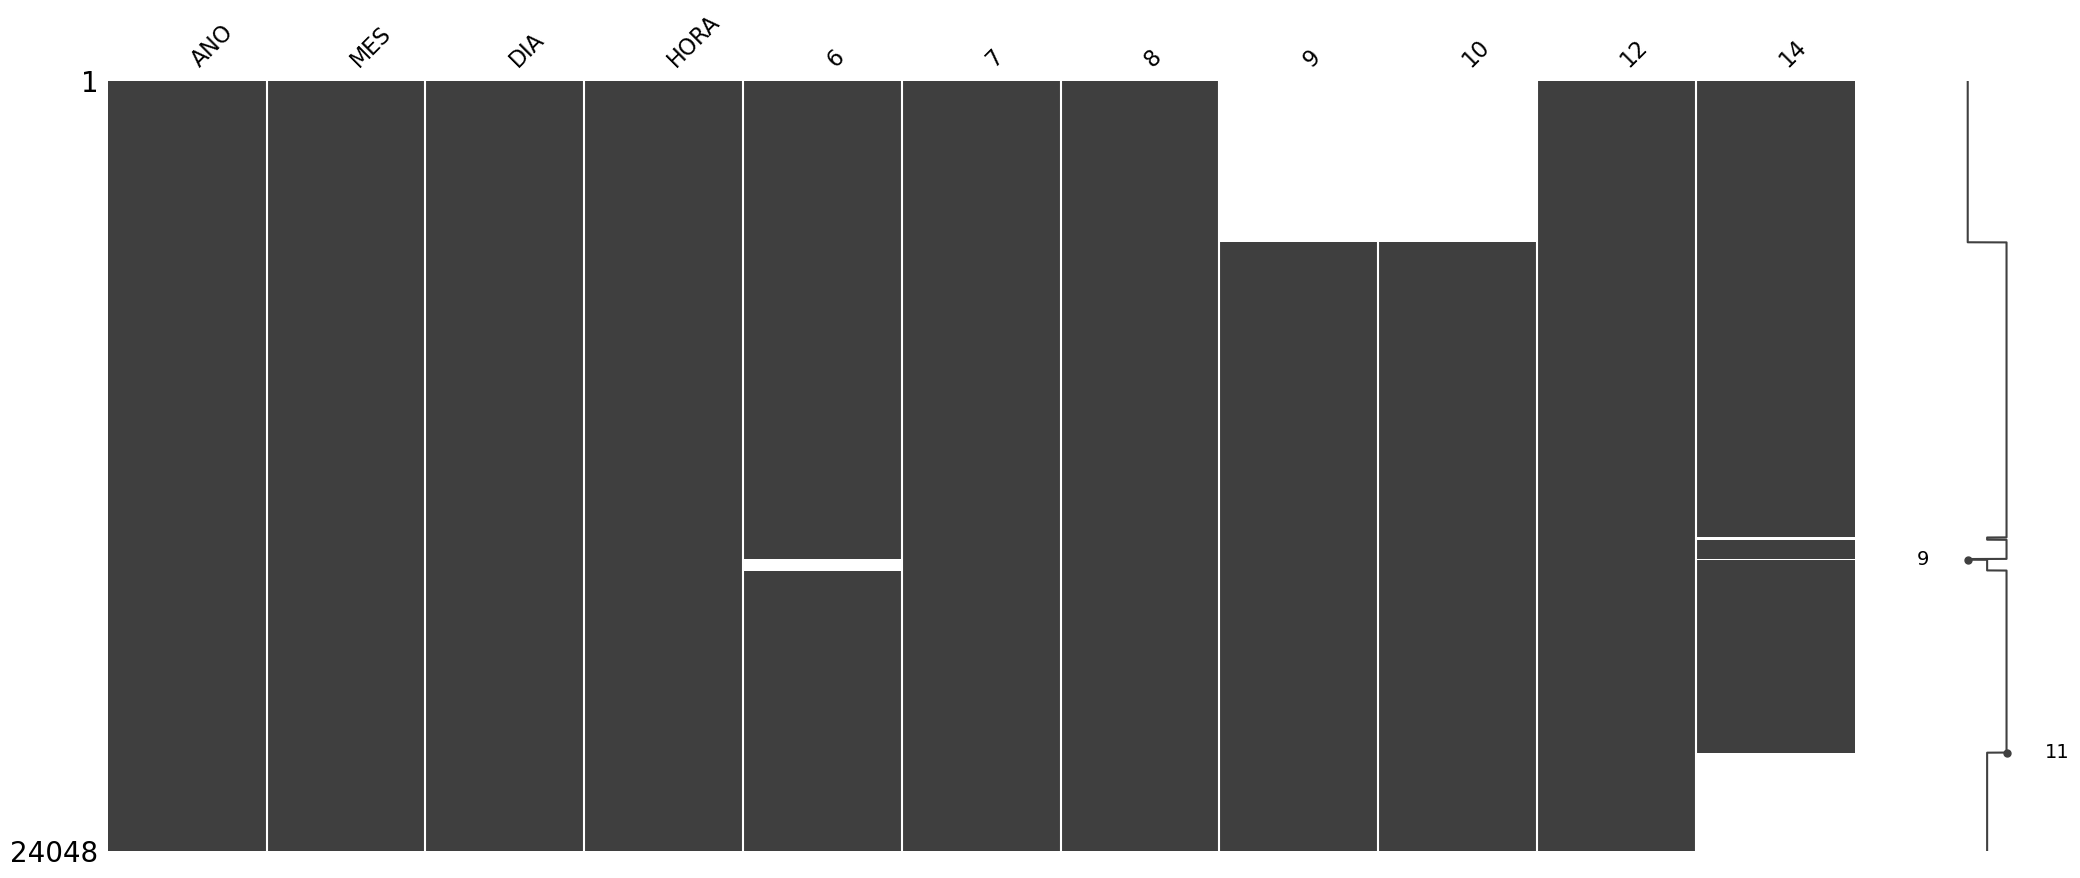

In [25]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/contaminacionFinal.csv"
df_conta = pd.read_csv(url)
msno.matrix(df_conta)
plt.show()

En la columna 6 queremos reemplazar el valor por el valor medio; para eso utilizaremos un [SimpleImputer}(https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

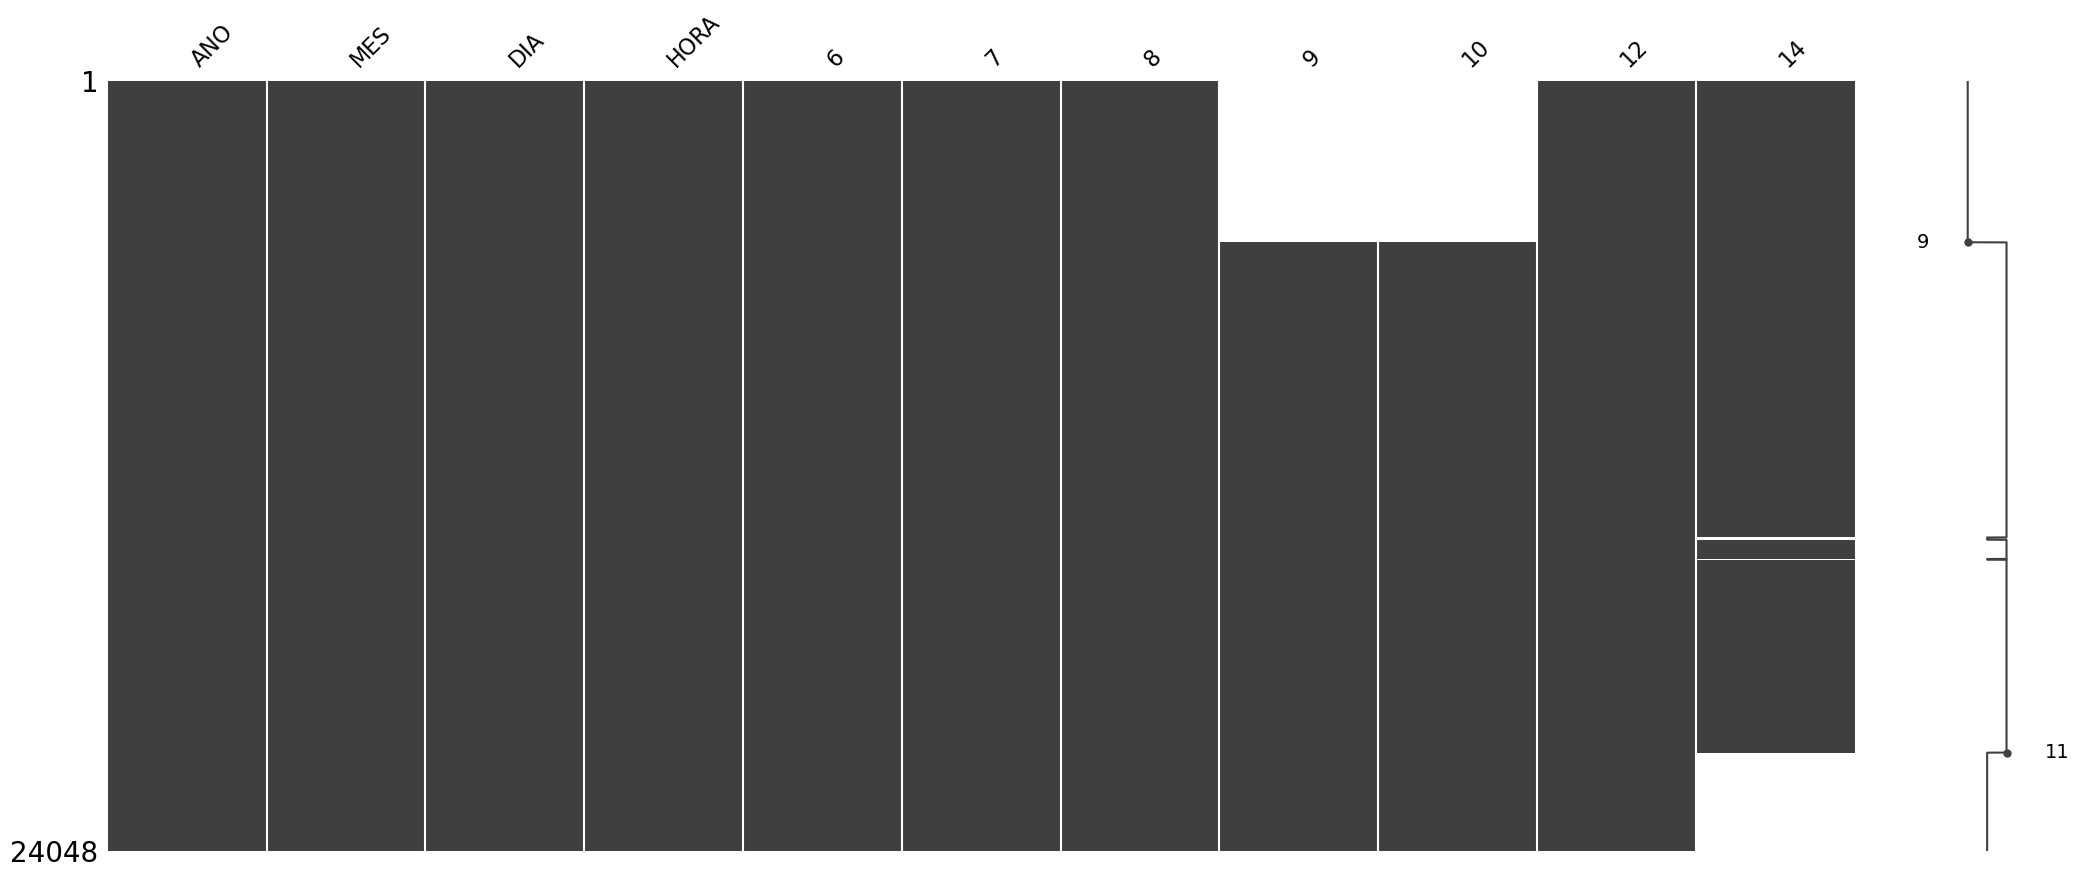

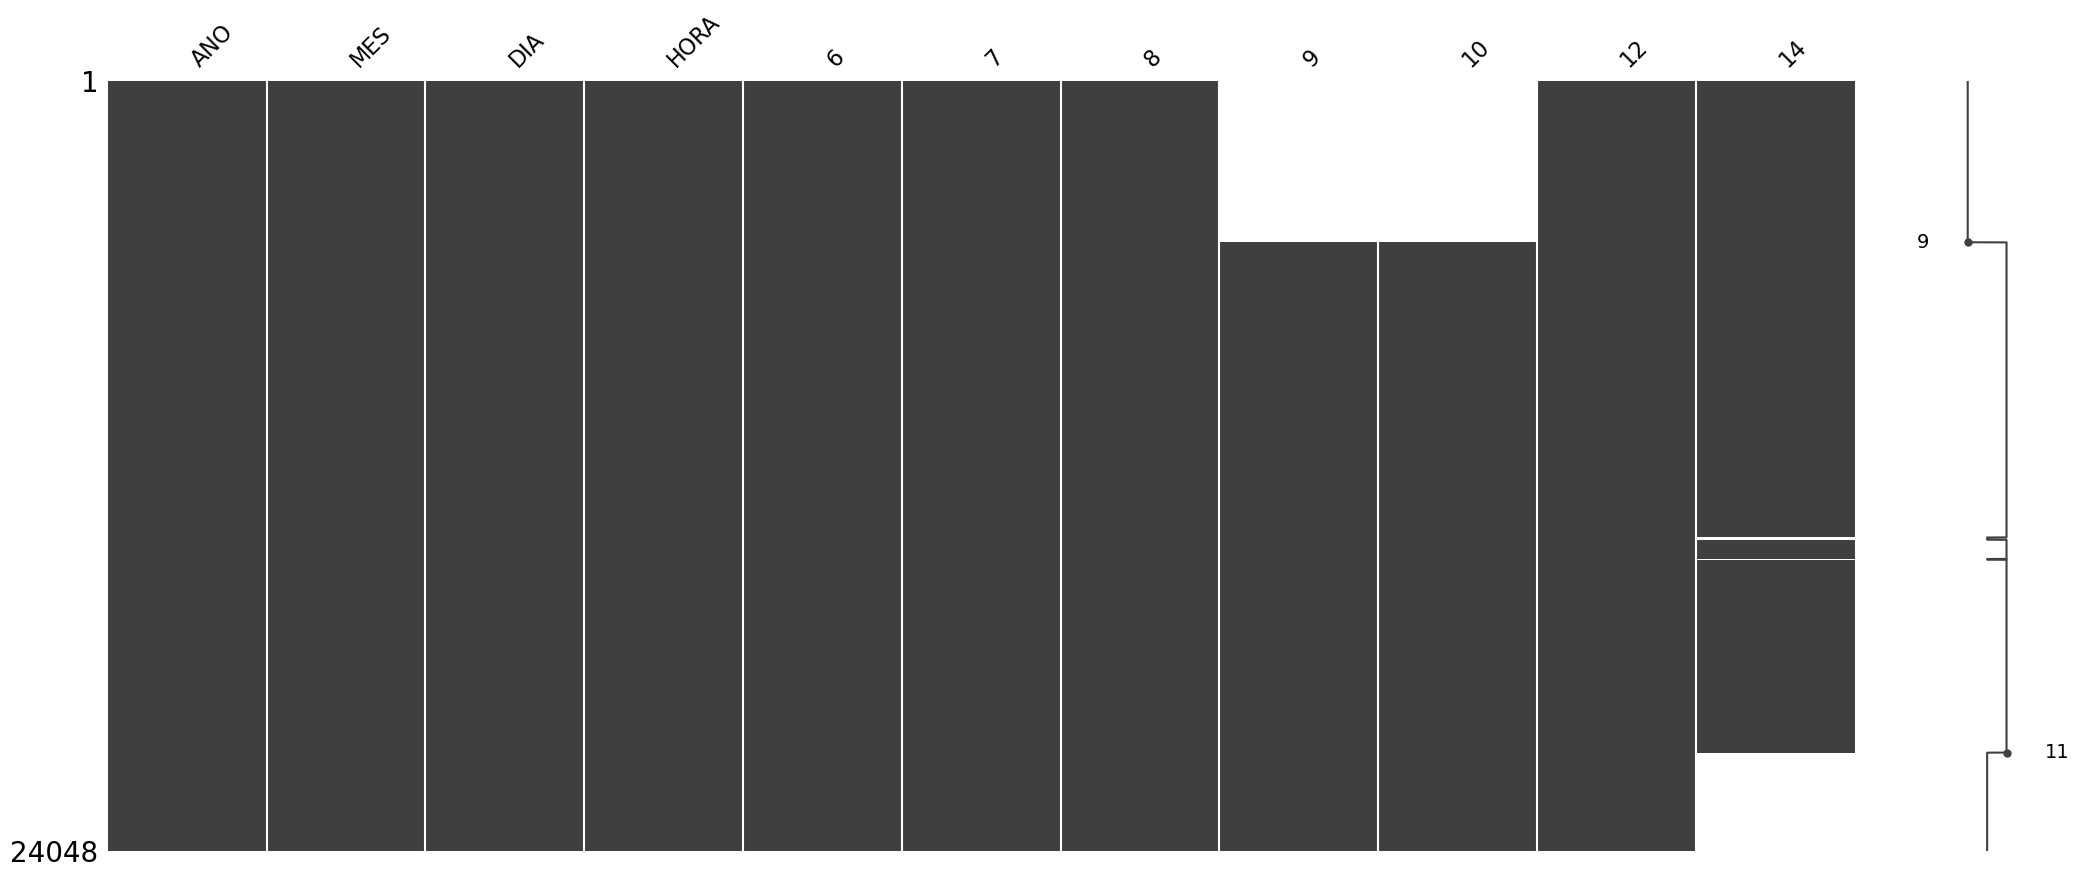

In [28]:
from sklearn.impute import SimpleImputer

#Hacemos una copia
df_imputed = df_conta.copy()

imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_conta[["6"]])
df_imputed[["6"]]  = imp_mean.transform(df_conta[["6"]])
msno.matrix(df_imputed)
plt.show()

<a name="Tipos"></a>
## Tipos de nulos 

En [1976](https://www.jstor.org/stable/2335739) Donald B. Rubin distinguió 3 tipos de valores nulos:

* Si los datos perdidos se encuentran totalmente al azar en una columna y no depende del valor del resto de la fila, decimos que es  *missing completely at random* (MCAR). Nosotros les vamos a llamar Missing Independientes (MI). 

* Si el valor perdido está asociado a ciertos valores del resto de la fila tenemos valores *missing at random* (MAR), o Missing Dependientes (MD)

* En otro caso hablamos de *missing not at random* (MNAR): hay otras causas que no conocemos, no los vamos a considerar



<a name="Categorical"></a>
### MI versus MD en variables categóricas.

Podemos detectar si una columna depende de otra como (y por tanto es MAR y no MCAR) utilizando el test $\mathcal{X}^2$.
Empecemos por generar datos MI

In [32]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/contaminacionFinal.csv"
df_conta = pd.read_csv(url)
df_conta

,ANO,MES,DIA,HORA,6,7,8,9,10,12,14
0,2019,1,1,1,0.6,81,73,NaN,NaN,196,3.08
1,2019,1,1,2,0.8,124,82,NaN,NaN,272,3.05
2,2019,1,1,3,0.7,93,72,NaN,NaN,215,3.13
3,2019,1,1,4,0.6,86,66,NaN,NaN,198,3.02
4,2019,1,1,5,0.6,79,64,NaN,NaN,185,2.98
...,...,...,...,...,...,...,...,...,...,...,...
24043,2021,9,30,20,0.3,27,80,17.0,23.0,122,NaN
24044,2021,9,30,21,1.1,168,153,19.0,30.0,411,NaN
24045,2021,9,30,22,1.0,179,157,28.0,44.0,431,NaN
24046,2021,9,30,23,0.8,115,133,27.0,43.0,309,NaN


Nos inventamos una columna nueva que va a ser nula dependiendo del valor de un dado

In [33]:
import numpy as np
df_conta["15"] = 0 # para crearlo
df_conta["dado"] = 0 # para crearlo

df_conta["dado"]  = np.random.choice([1, 2, 3, 4, 5, 6], len(df_conta), p=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

# nos quedamos con las filas en las que el dado tiene un 6
index = df_conta[df_conta["dado"]==6].index

# le ponemos nulos
df_conta.loc[index,"15"] = pd.NA
df_conta

,ANO,MES,DIA,HORA,6,7,8,9,10,12,14,15,dado
0,2019,1,1,1,0.6,81,73,NaN,NaN,196,3.08,0.0,5
1,2019,1,1,2,0.8,124,82,NaN,NaN,272,3.05,0.0,5
2,2019,1,1,3,0.7,93,72,NaN,NaN,215,3.13,0.0,2
3,2019,1,1,4,0.6,86,66,NaN,NaN,198,3.02,0.0,5
4,2019,1,1,5,0.6,79,64,NaN,NaN,185,2.98,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,2021,9,30,20,0.3,27,80,17.0,23.0,122,NaN,NaN,6
24044,2021,9,30,21,1.1,168,153,19.0,30.0,411,NaN,NaN,6
24045,2021,9,30,22,1.0,179,157,28.0,44.0,431,NaN,0.0,2
24046,2021,9,30,23,0.8,115,133,27.0,43.0,309,NaN,0.0,5


Para aplicar el test convertimos la columna que queremos examinar, la "15", en una nueva que vale 1 si es nulo y 0  en otro caso

In [34]:
df_conta["15_missing"] = 0
indice_nulos = df_conta[df_conta['15'].isnull()].index
df_conta.loc[indice_nulos, "15_missing"] = 1
df_conta

,ANO,MES,DIA,HORA,6,7,8,9,10,12,14,15,dado,15_missing
0,2019,1,1,1,0.6,81,73,NaN,NaN,196,3.08,0.0,5,0
1,2019,1,1,2,0.8,124,82,NaN,NaN,272,3.05,0.0,5,0
2,2019,1,1,3,0.7,93,72,NaN,NaN,215,3.13,0.0,2,0
3,2019,1,1,4,0.6,86,66,NaN,NaN,198,3.02,0.0,5,0
4,2019,1,1,5,0.6,79,64,NaN,NaN,185,2.98,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,2021,9,30,20,0.3,27,80,17.0,23.0,122,NaN,NaN,6,1
24044,2021,9,30,21,1.1,168,153,19.0,30.0,411,NaN,NaN,6,1
24045,2021,9,30,22,1.0,179,157,28.0,44.0,431,NaN,0.0,2,0
24046,2021,9,30,23,0.8,115,133,27.0,43.0,309,NaN,0.0,5,0


Veamos primero cómo se relaciona con una columna nominal

In [35]:
contingencias=pd.crosstab(index=df_conta.ANO,columns=df_conta["15_missing"])
contingencias

15_missing,0,1
dado,,
1,4058,0
2,3937,0
3,3965,0
4,4097,0
5,4035,0
6,0,3956


In [37]:
from scipy.stats import chi2_contingency
 
# este es el test
ChiSqResult = chi2_contingency(contingencias)
print(ChiSqResult)

Chi2ContingencyResult(statistic=3.6512327823415935, pvalue=0.16111830161742763, dof=2, expected_freq=array([[7278.83832335, 1433.16167665],
       [7338.99401198, 1445.00598802],
       [5474.16766467, 1077.83233533]]))
Chi2ContingencyResult(statistic=24048.0, pvalue=0.0, dof=5, expected_freq=array([[3390.44145043,  667.55854957],
       [3289.34647372,  647.65352628],
       [3312.74035263,  652.25964737],
       [3423.02578177,  673.97421823],
       [3371.2250499 ,  663.7749501 ],
       [3305.22089155,  650.77910845]]))


Como $H_0$ = No hay correlación entre las variables, tenemos que como p>0.05 no podemos descartar no haya correlación, en principio asumimos MI. Sin embargo, si probamos la variable 15_missing vs el dado:

In [ ]:
contingencias2=pd.crosstab(index=df_conta.dado,columns=df_conta["15_missing"])
contingencias2

ChiSqResult2 = chi2_contingency(contingencias2)
print(ChiSqResult2)

Miremos otra variable:

In [ ]:
df_conta["9_missing"] = 0
indice_nulos = df_conta[df_conta['9'].isnull()].index
df_conta.loc[indice_nulos, "9_missing"] = 1
contingencias=pd.crosstab(index=df_conta.ANO,columns=df_conta["9_missing"])
ChiSqResult = chi2_contingency(contingencias)
ChiSqResult

Chi2ContingencyResult(statistic=11224.507888805409, pvalue=0.0, dof=2, expected_freq=array([[6886.13173653, 1825.86826347],
       [6943.04191617, 1840.95808383],
       [5178.82634731, 1373.17365269]]))

Sale que sí hay correlación con el año; estamos en el caso de MD. Veamos si podemos ver esta relación gráficamente:

<AxesSubplot: xlabel='ANO', ylabel='Count'>

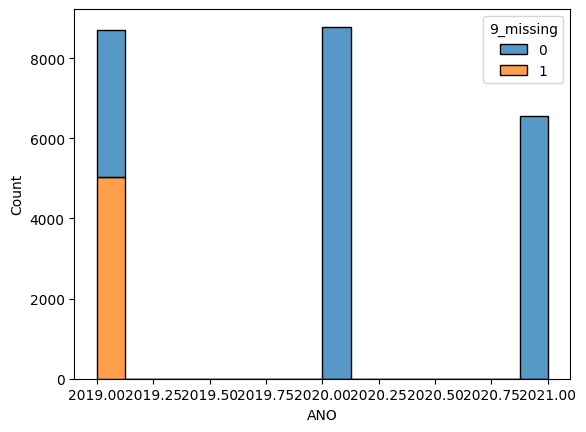

In [ ]:
sns.histplot(data=df_conta, hue="9_missing",x="ANO",stat="count", multiple="stack")

Cabría pensar en si merece la pena tratar aparte el año 2019

## Ejercicio: Análisis exploratorio y limpieza de datos astronómicos

A partir del conjunto de datos planets proporcionado por Seaborn, se requiere realizar un análisis exploratorio de los valores ausentes e implementar un proceso de limpieza que permita dejar el conjunto de datos listo para su análisis.

#### Carga y preparación del conjunto de datos
Se carga el conjunto planets desde Seaborn. Para simular un escenario más realista, se introducen valores ausentes de forma aleatoria en varias columnas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Carga del dataset original
df = sns.load_dataset("planets")

print(df.info())

# Introducción artificial de valores ausentes para el ejercicio
np.random.seed(33)
df.loc[df.sample(frac=0.1).index, 'orbital_period'] = np.nan
df.loc[df.sample(frac=0.05).index, 'mass'] = np.nan
df.loc[df.sample(frac=0.02).index, 'distance'] = np.nan
df.loc[df.sample(frac=0.04).index, 'method'] = np.nan

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          994 non-null    object 
 1   number          1035 non-null   int64  
 2   orbital_period  892 non-null    float64
 3   mass            482 non-null    float64
 4   distance        792 non-null    float64
 5   year            1035 non-null   int64  


#### Inspección del dataset. Haz un resumen del número de valores nulos por variable y se realiza una visualización mediante la librería missingno.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          994 non-null    object 
 1   number          1035 non-null   int64  
 2   orbital_period  892 non-null    float64
 3   mass            482 non-null    float64
 4   distance        792 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
method             41
number              0
orbital_period    143
mass              553
distance          243
year                0
dtype: int64


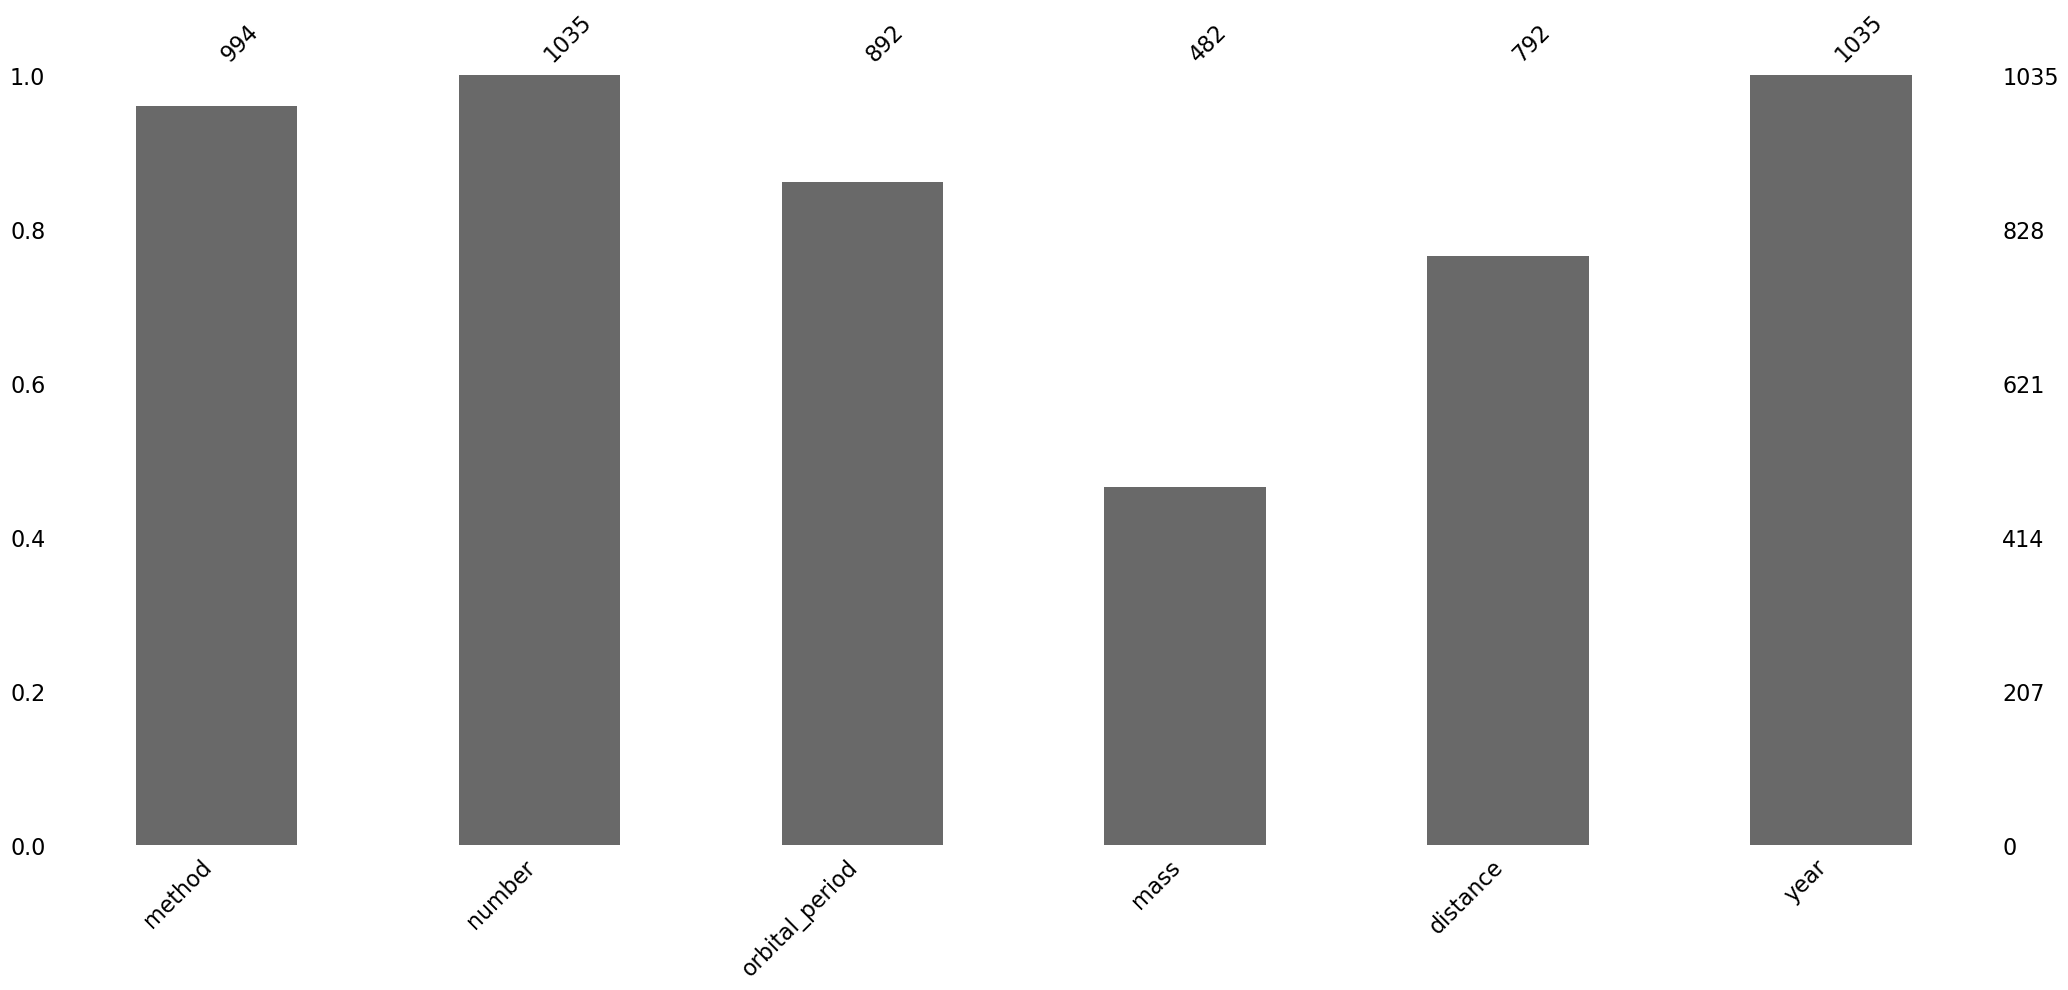

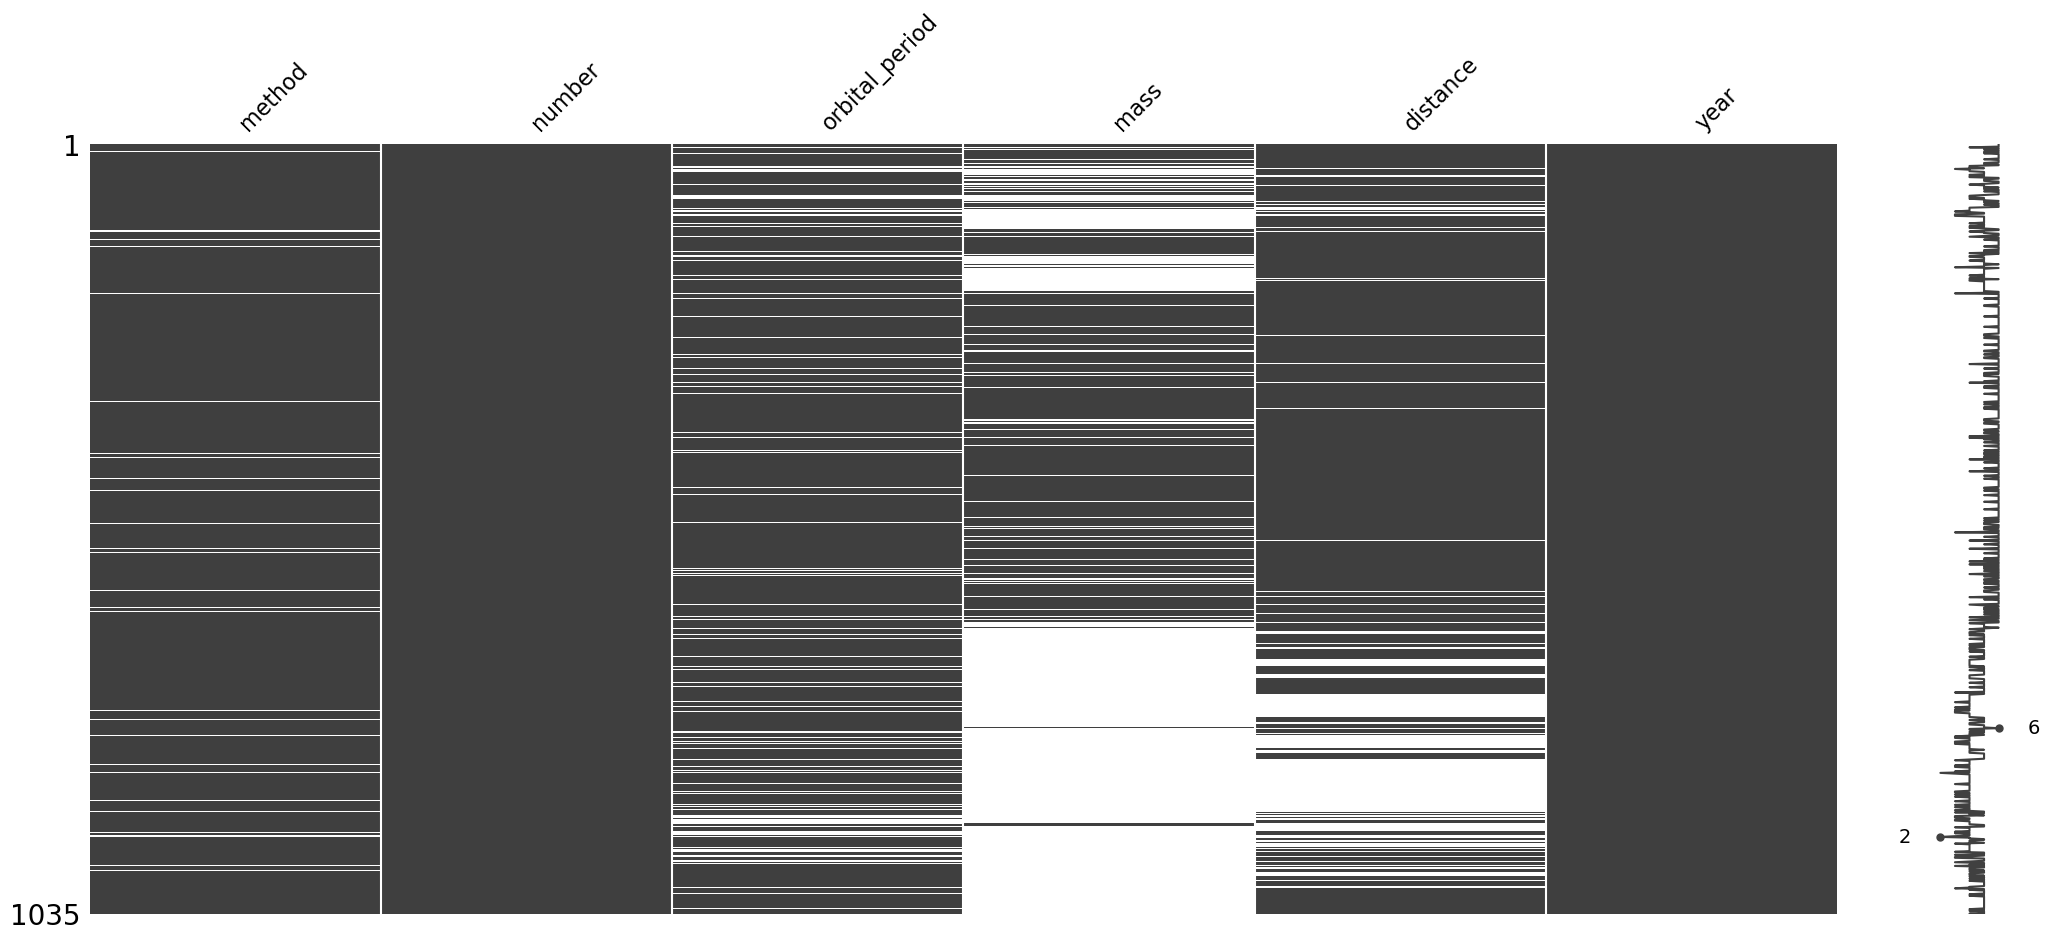

In [2]:
# Resumen general

# Conteo de valores nulos por columna

# Visualización gráfica de los valores faltantes



#### Limpieza del conjunto de datos. 
Elimina las filas completamente vacías, las filas con menos de un 60% de valores válidos y columnas con más de un 25% de valores nulos. 
PD: Para hallar los porcentajes, puedes explorar la función `df.shape`


In [3]:
df.shape

(1035, 6)

In [4]:
#Filas con todos los valores nulos

#Columnas con más de un 25% de valores nulos

#Filas


Imputa valores de media, a las columnas que sigan teniendo nulos despues de este proceso.

In [5]:
# Imputación de valores
    
# Imputación de valores categóricos (os lo dejo para que lo veáis como ejemplo)
if 'method' in df.columns:
    df['method'] = df['method'].fillna(df['method'].mode()[0])

#### Finalmente, comprobamos que el dataset está limpio y preparado

method            0
number            0
orbital_period    0
distance          0
year              0
dtype: int64


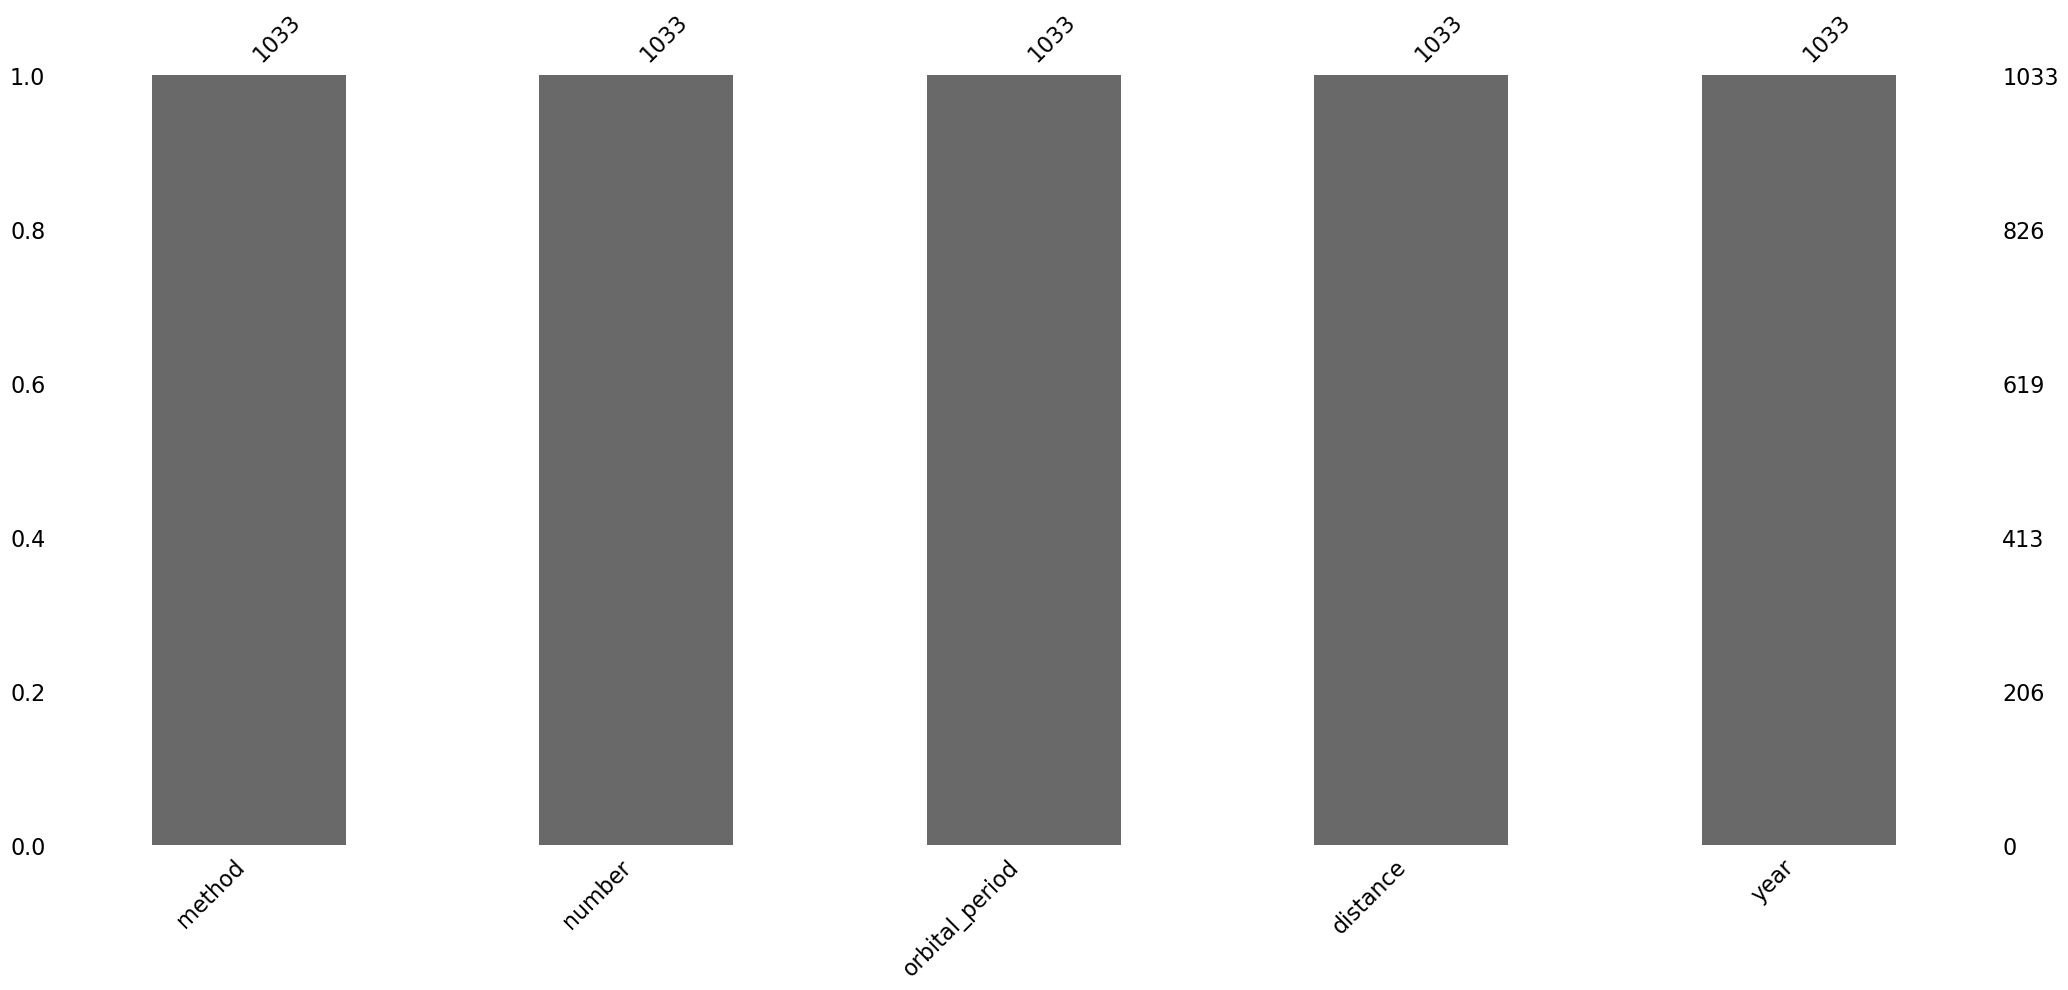

<a name="Bibliografía"></a>
## Bibliografía

[Visualización](https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea) con el ejemplo del titanic que hemos mostrado

[MCAR, MAR, MNAR](https://stefvanbuuren.name/fimd/sec-MCAR.html)

[El test $\mathcal{X}^2$ para distinguir MCAR de MAR](https://www.kaggle.com/code/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i/notebook)